# Lab Segmentation 2

In [1]:
from commonfunctions import *
from skimage.filters import median, gaussian
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.filters import gaussian

In [2]:
def calc_T(histOrig, start, end):
    if(start==end):
        return start-1
    L=list(range(start, end))

    sum = np.sum(np.multiply(histOrig, L))
    cdf = histOrig.cumsum()

    T = cdf[-1]!=0 and round(sum/cdf[-1]) or 0
    return T

In [3]:
def conver_gray(img):
    if(len(img.shape)==2):
        img=img
    elif(img.shape[2]==4):
        img=rgb2gray(rgba2rgb(img))
        img=img*255
    elif(img.shape[2]==3):
        img=rgb2gray(img)
        img=img*255
    return img

In [4]:
def getThreshold(img):

    img = img.astype('uint8')

    histOrig, bins = np.histogram(img, 256, [0, 255])

    T = calc_T(histOrig, 0, 256)
    T_new =  T

    while(True):
        T_prev = T_new
        lower = histOrig[0:T_prev+1]
        T_lower = calc_T(lower, 0, T_prev+1)

        upper = histOrig[T_prev+1:256]
        T_upper = calc_T(upper, T_prev+1, 256)
        
        T_new = (T_lower + T_upper)//2

        if(T_new == T_prev or abs(T_new-T_prev)==1):
            break

    # this is exactly the condition but it works
    img = np.where(img>T_new-1,255,0) 
    return img


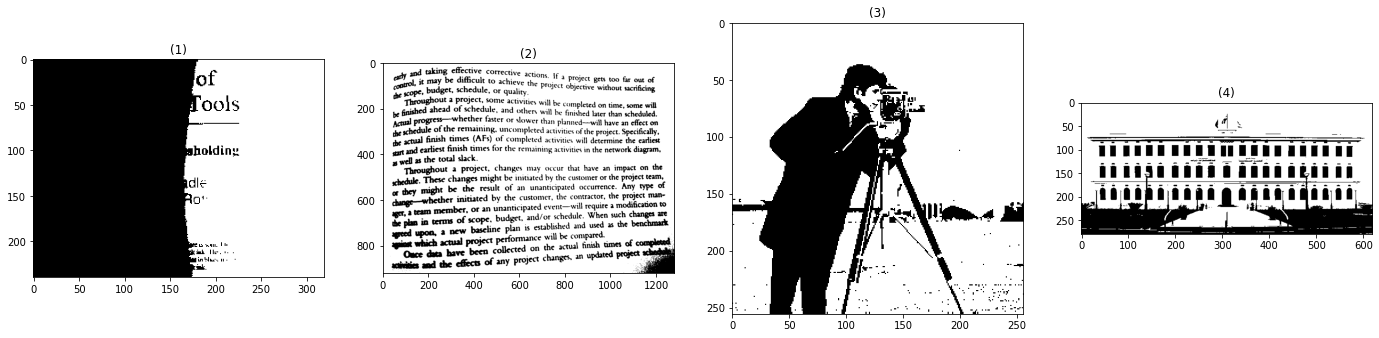

In [5]:
img1 = getThreshold(conver_gray(io.imread('book.png')))
img2 = getThreshold(conver_gray(io.imread('book1.png')))
img3 = getThreshold(conver_gray(io.imread('cameraman.png')))
img4 = getThreshold(conver_gray(io.imread('cufe.png')))

show_images([img1,img2,img3,img4])

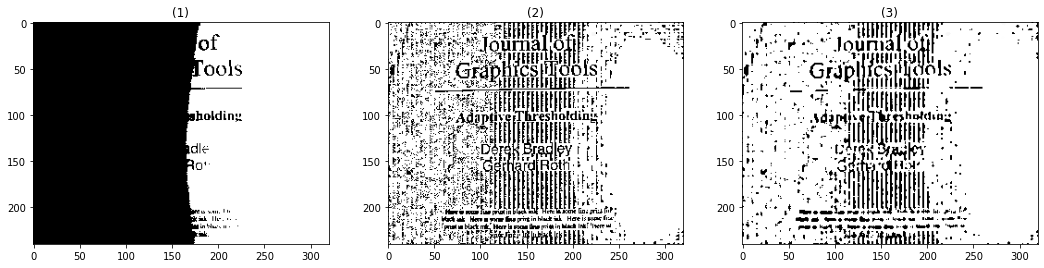

In [15]:
img = conver_gray(io.imread('book.png'))
img_global = img.copy()

def recursive(img, i):
    if(img.min()==img.max()):
        return img
    h , w = img.shape
    if (h<7 or w<7):
        img = getThreshold(img)
        return img

    img1 = img[0:h//2, 0:w//2]
    img2 = img[h//2:h, 0:w//2]
    img3 = img[0:h//2, w//2:w]
    img4 = img[h//2:h, w//2:w]
    img[0:h//2, 0:w//2] = recursive(img1, i+1)
    img[h//2:h, 0:w//2] = recursive(img2, i+1)
    img[0:h//2, w//2:w] = recursive(img3, i+1)
    img[h//2:h, w//2:w] = recursive(img4, i+1)
    return img

i=0
img = recursive(img, i)
# filtered = func(img,3)
img_global = getThreshold(img_global)
after_image = median(img)

img=gaussian(img,sigma=0.)
show_images([img_global, img,after_image])

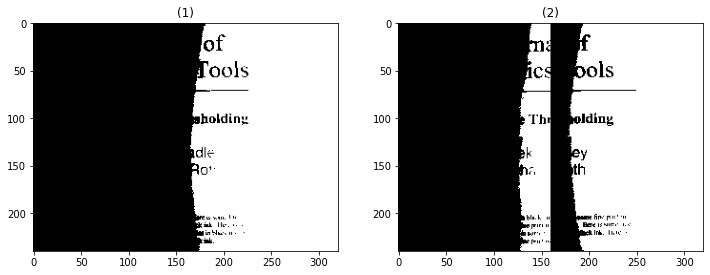

In [7]:
img = io.imread('book.png')
img_global = img.copy()
if(len(img.shape)==2):
    img=img
elif(img.shape[2]==4):
    img=rgb2gray(rgba2rgb(img))
    img=img*255
elif(img.shape[2]==3):
    img=rgb2gray(img)
    img=img*255

h , w = img.shape

img1 = getThreshold(img[0:h//2, 0:w//2])
img2 = getThreshold(img[h//2:h, 0:w//2])
img3 = getThreshold(img[0:h//2, w//2:w])
img4 = getThreshold(img[h//2:h, w//2:w])

img[0:h//2, 0:w//2] = img1
img[h//2:h, 0:w//2] = img2
img[0:h//2, w//2:w] = img3
img[h//2:h, w//2:w] = img4

img_global = getThreshold(img_global)

show_images([img_global,img])
